#Libraries-Framework

In [ ]:
!pip install tensorflow==2.10.0
!pip install Keras-Applications=== 1.0.7
!pip install image-classifiers == 1.0
!pip install efficientnet == 1.0
!pip install patchify
!pip install -U segmentation-models
!pip install rasterio
!pip install image-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 110.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 61.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-

ERROR: Could not find a version that satisfies the requirement Keras-Applications=== (from versions: 1.0.0, 1.0.1, 1.0.2, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8)
ERROR: No matching distribution found for Keras-Applications===
ERROR: Invalid requirement: '=='
ERROR: Invalid requirement: '=='
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install -U segmentation-models

In [ ]:
import segmentation_models as sm
import tensorflow as tf
from tensorflow import keras
import rasterio

Segmentation Models: using `keras` framework.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 23.9 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import os
import random
import tqdm
import cv2
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import segmentation_models as sm
import tensorflow  as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from collections import Counter
from PIL import Image
from keras.utils import to_categorical, normalize
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from tensorflow.keras.metrics import MeanIoU, IoU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.experimental.numpy import ravel
from tensorflow import stack, cast, int32, make_ndarray
from natsort import natsorted
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

  Preparing metadata (setup.py) ... done
  Using cached pbr-6.0.0-py2.py3-none-any.whl (107 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.2 MB/s eta 0:00:00
  Created wheel for image-utils: filename=image_utils-0.1.6-py3-none-any.whl size=8982 sha256=1e9c7aa2e6102f31ed583c7c79c7fa50d0cdab731e12c9c3d5e79e7d663c458c
  Stored in directory: /root/.cache/pip/wheels/46/6b/b1/fe329b087e7a28284544076432b7ec788904698e8ee49f36a8
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=d49f4fab058f540aeab47b22296d6f094baa311c3df08496bdcf206a453560d9
  Stored in directory: /root/.cac

In [ ]:
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
# from tensorflow.keras.models import load_model
from keras.models import load_model



#Data preprocessing

In [ ]:
def list_files(directory, extensions=None):
    """
    List all files in a given directory with specified extensions
    """
    if extensions is None:
        extensions = ['.tif', '.tiff', '.jpg', '.jpeg', '.png']  # Add or remove extensions based on your dataset
    return [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and os.path.splitext(f)[1].lower() in extensions]


argumentation showed a negative result

In [ ]:
class MaskClassifier:
    def __init__(self, mask_files, image_files, path,file_path):
        self.mask_files = mask_files
        self.image_files = image_files
        self.file_path = file_path

        self.path = path
        self.idx = 0

    def classify_and_save_blocks(self):
        block_size = 256

        # Create directories for image and mask blocks
        image_blocks_dir = os.path.join(self.path, self.file_path, 'image',"i")
        mask_blocks_dir = os.path.join(self.path, self.file_path, 'mask',"i")
        os.makedirs(image_blocks_dir, exist_ok=True)
        os.makedirs(mask_blocks_dir, exist_ok=True)
        for count, (mask_file, image_file) in enumerate(zip(self.mask_files, self.image_files)):
            with rasterio.open(image_file) as src_image:
                image_data = src_image.read()

            with rasterio.open(mask_file) as src_mask:
                mask_data = src_mask.read(1)

            height, width = image_data.shape[1:]
            num_blocks_h = height // block_size
            num_blocks_w = width // block_size

            for i in range(num_blocks_h):
                for j in range(num_blocks_w):
                    row_start = i * block_size
                    row_end = (i + 1) * block_size
                    col_start = j * block_size
                    col_end = (j + 1) * block_size

                    block_image = image_data[:, row_start:row_end, col_start:col_end]
                    original_image = block_image.transpose(1, 2, 0)
                    mask_block = mask_data[row_start:row_end, col_start:col_end]
                    # s,d= np.unique(mask_block, return_counts=True)

                    # if len(d) == 2:
                    #    rotated_90_mask = cv2.rotate(mask_block, cv2.ROTATE_90_CLOCKWISE)
                    #    rotated_180_mask = cv2.rotate(mask_block, cv2.ROTATE_180)
                    #    rotated_270_mask = cv2.rotate(mask_block, cv2.ROTATE_90_COUNTERCLOCKWISE)

                    #    rotated_90 = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)
                    #    rotated_180 = cv2.rotate(original_image, cv2.ROTATE_180)
                    #    rotated_270 = cv2.rotate(original_image, cv2.ROTATE_90_COUNTERCLOCKWISE)

                    if original_image.shape[:2] == (block_size, block_size) and mask_block.shape == (block_size, block_size):
                    #  for i, (mask, image) in enumerate(zip([mask_block, rotated_90_mask], [original_image, rotated_90])):
                      cv2.imwrite(f'{self.path}/{self.file_path}/mask/i/mask_{self.idx}.tif', mask_block)
                      cv2.imwrite(f'{self.path}/{self.file_path}/image/i/image_{self.idx}.tif', original_image)
                      self.idx += 1
                    else:
                      print(f"Block at index {self.idx} does not have the expected shape")






In [ ]:
mask_directory = '/content/drive/MyDrive/dataset/data_2/train/masks'
image_directory = '/content/drive/MyDrive/dataset/data_2/train/images'
output_directory = '/content/data6'
if not os.path.exists(output_directory):
        os.makedirs(output_directory)

# List files in the directories
mask_files = sorted(list_files(mask_directory))
image_files = sorted(list_files(image_directory))


# Create an instance of MaskClassifier
classifier = MaskClassifier(mask_files, image_files, output_directory,"train")

# Process the files
classifier.classify_and_save_blocks()

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
mask_directory = '/content/drive/MyDrive/dataset/data_2/test/masks'
image_directory = '/content/drive/MyDrive/dataset/data_2/test/images'
output_directory = '/content/data6'
if not os.path.exists(output_directory):
        os.makedirs(output_directory)

# List files in the directories
mask_files = sorted(list_files(mask_directory))
image_files = sorted(list_files(image_directory))


# Create an instance of MaskClassifier
classifier = MaskClassifier(mask_files, image_files, output_directory,"test")

# Process the files
classifier.classify_and_save_blocks()

In [ ]:
mask_directory = '/content/drive/MyDrive/dataset/data_2/vel/masks'
image_directory = '/content/drive/MyDrive/dataset/data_2/vel/images'
output_directory = '/content/data6'
if not os.path.exists(output_directory):
      os.makedirs(output_directory)

mask_files = sorted(list_files(mask_directory))
image_files = sorted(list_files(image_directory))

classifier = MaskClassifier(mask_files, image_files, output_directory,"val")

# Process the files
classifier.classify_and_save_blocks()

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
len(os.listdir('/content/data6/train/image/i'))

8701

In [ ]:
len(os.listdir('/content/data6/val/image/i'))

1909

In [ ]:
BACKBONE = 'mobilenet'

preprocess_input = sm.get_preprocessing(BACKBONE)
BATCH_SIZE = 16
SEED = 42
RAW_N_CLASSES = 2
N_CLASSES = 2

In [ ]:
def merge_classes(mask, cls1, cls2, raw_num_classes=RAW_N_CLASSES):
    mask[mask == cls1] = cls2
    for i in range(cls1 + 1, raw_num_classes):
        mask[mask==i] = i - 1
    return mask

def preprocess_data(img, mask, num_class):
    img = preprocess_input(img)

    mask = merge_classes(mask, 7, 6)


    mask = merge_classes(mask, 13, 12)
    values, counts = np.unique(mask, return_counts=True)

    mask = to_categorical(mask, num_class)
    return (img, mask)

def trainGenerator(train_img_path, train_mask_path, num_class, aug=True, show_raw=False):

    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')
    if aug:
        image_datagen = ImageDataGenerator(**img_data_gen_args)
        mask_datagen = ImageDataGenerator(**img_data_gen_args)
    else:
        image_datagen = ImageDataGenerator()
        mask_datagen = ImageDataGenerator()

    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = BATCH_SIZE,
        seed = SEED)
    print(image_generator)
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        batch_size = BATCH_SIZE,
        seed = SEED)
    print(mask_generator)
    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        if show_raw:
            raw_img = np.copy(img)
            # print(mask)
            mask = np.array(mask > 0.5)


            img, mask = preprocess_data(img, mask, num_class)
            img = np.stack((img, raw_img), axis=-1)
            yield (img, mask)
        else:
            mask = np.array(mask > 0.5)

            img, mask = preprocess_data(img, mask, num_class)
            yield (img, mask)


def show_mask_with_label(batch, labels, _min, _max, alpha=1):
    values, counts = np.unique(batch, return_counts=True)
    print(values)
    print(counts)

    counts = counts / (256*256)
    im = plt.imshow(batch, cmap='viridis', vmin = _min, vmax = _max, alpha=alpha)
    colors = [im.cmap(im.norm(value)) for value in values]


    patches = [mpatches.Patch(color=colors[i], label=labels[values[i]]) \
               for i in range(len(values)) if counts[i] > 0.005]
    plt.legend(handles=patches)

In [ ]:
labels = ['фон','здания']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_img_gen = trainGenerator("/content/data6/train/image","/content/data6/train/mask",2)


x, y = next(train_img_gen)
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Found 8701 images belonging to 1 classes.
Found 8701 images belonging to 1 classes.
Shape of x: (16, 256, 256, 3)
Shape of y: (16, 256, 256, 2)


In [ ]:
test =  trainGenerator("/content/data6/test/image","/content/data6/test/mask",2)
x, y = next(test)
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Found 684 images belonging to 1 classes.
Found 684 images belonging to 1 classes.
Shape of x: (16, 256, 256, 3)
Shape of y: (16, 256, 256, 2)


In [ ]:
val =  trainGenerator("/content/data6/val/image","/content/data6/val/mask",2)
x, y = next(val)
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Found 1909 images belonging to 1 classes.
Found 1909 images belonging to 1 classes.
Shape of x: (16, 256, 256, 3)
Shape of y: (16, 256, 256, 2)


In [ ]:
val =  trainGenerator("/content/data6/val/image","/content/data6/val/mask",2)
x, y = next(val)

Found 1909 images belonging to 1 classes.
Found 1909 images belonging to 1 classes.


Data visualization

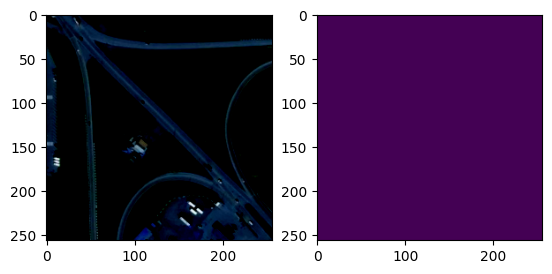

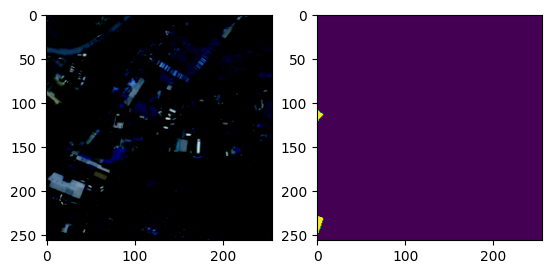

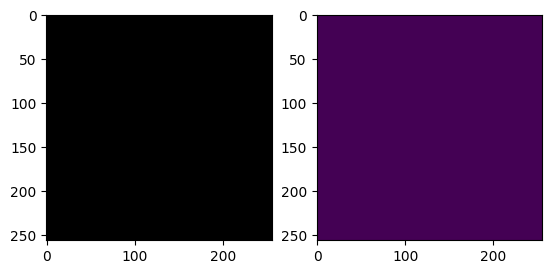

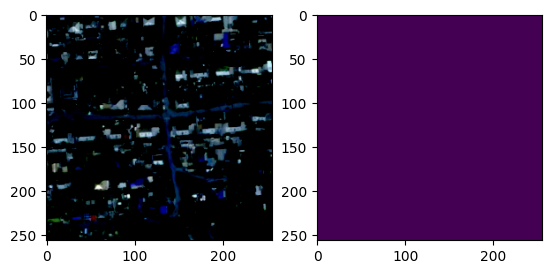

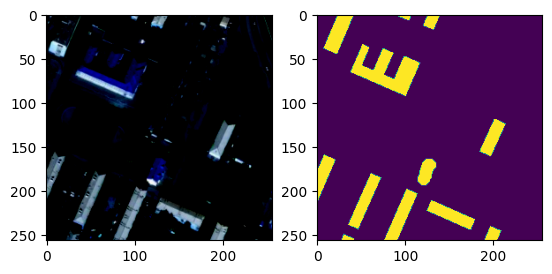

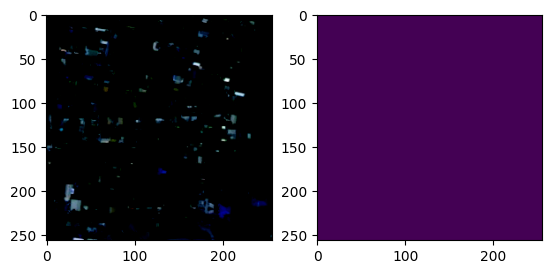

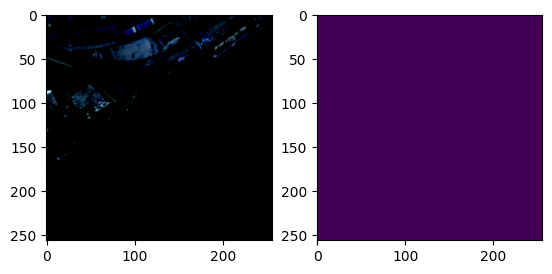

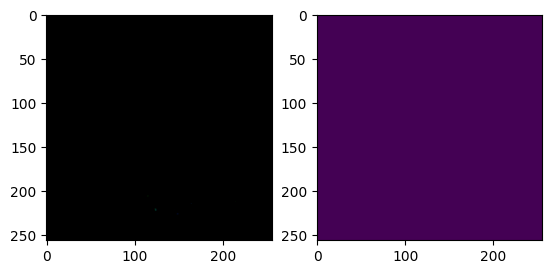

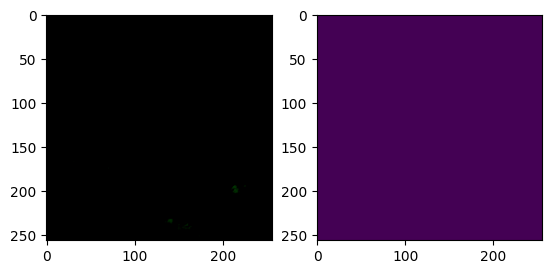

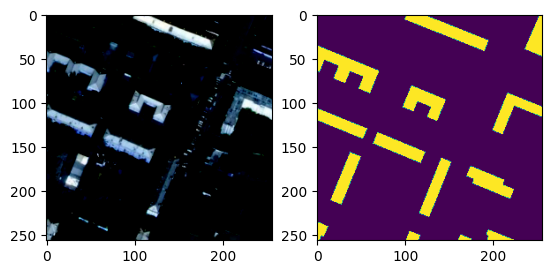

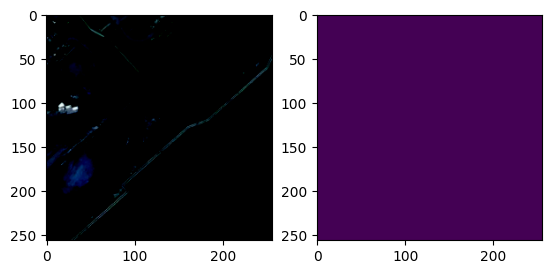

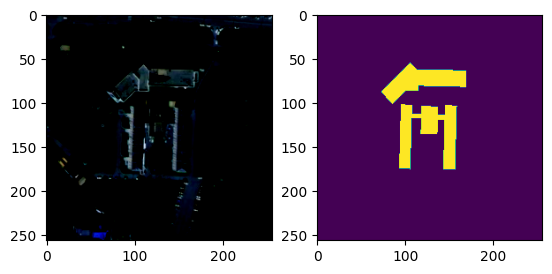

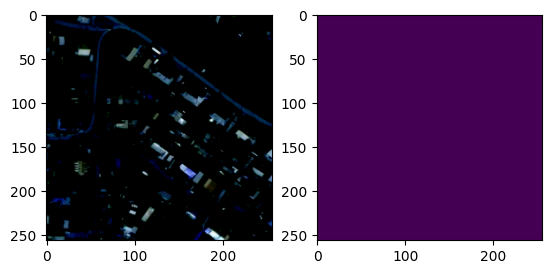

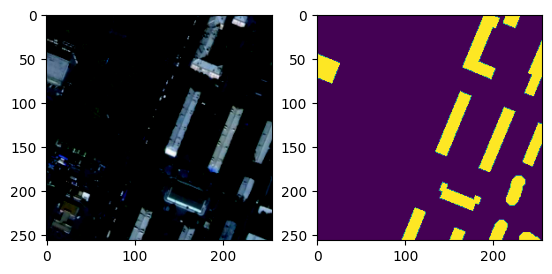

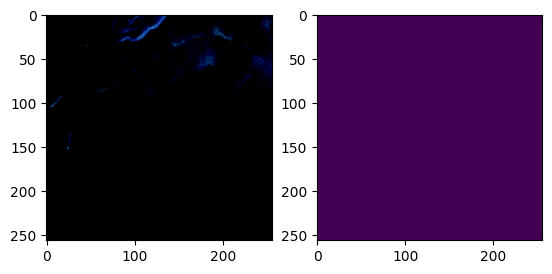

In [ ]:
def show_examples(generator):
    x, y = generator.__next__()
    for i in range(0,15):
        image = x[i]

        mask = np.argmax(y[i], axis=2)
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.subplot(1,2,2)
        plt.imshow(mask, cmap='viridis')
        plt.show()
    return x, y

x, y = show_examples(test)

#Model

In [ ]:

# # Создание модели
# model = sm.Unet(BACKBONE, classes=2, encoder_weights='imagenet')
# model.compile(
#     optimizer=Adam(),
#     loss=sm.losses.bce_jaccard_loss,
#     metrics=[sm.metrics.iou_score]
# )

/usr/local/lib/python3.10/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [ ]:
model = sm.Unet(BACKBONE, classes=2, encoder_weights='imagenet')
model.compile('Adam',   loss=sm.losses.bce_jaccard_loss, metrics=[iou_score])

/usr/local/lib/python3.10/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17225924/17225924 [==============================] - 0s 0us/step


#Training and tests

In [ ]:
# Defining a folder for saving models
model_save_path = '/content/drive/MyDrive/Unet1/'


Epoch 1/40
200/200 [==============================] - ETA: 0s - loss: 0.5898 - iou_score: 0.5962Found 1909 images belonging to 1 classes.
Found 1909 images belonging to 1 classes.
200/200 [==============================] - 70s 288ms/step - loss: 0.5898 - iou_score: 0.5962 - val_loss: 1.2261 - val_iou_score: 0.5020
Epoch 2/40
200/200 [==============================] - 60s 300ms/step - loss: 0.4558 - iou_score: 0.6756 - val_loss: 0.8157 - val_iou_score: 0.5800
Epoch 3/40
200/200 [==============================] - 59s 294ms/step - loss: 0.4302 - iou_score: 0.6960 - val_loss: 0.4760 - val_iou_score: 0.6768
Epoch 4/40
200/200 [==============================] - 57s 285ms/step - loss: 0.4177 - iou_score: 0.7067 - val_loss: 0.4923 - val_iou_score: 0.6693
Epoch 5/40
200/200 [==============================] - 53s 265ms/step - loss: 0.4164 - iou_score: 0.7065 - val_loss: 0.4449 - val_iou_score: 0.6878
Epoch 6/40
200/200 [==============================] - 56s 282ms/step - loss: 0.4045 - iou_score:

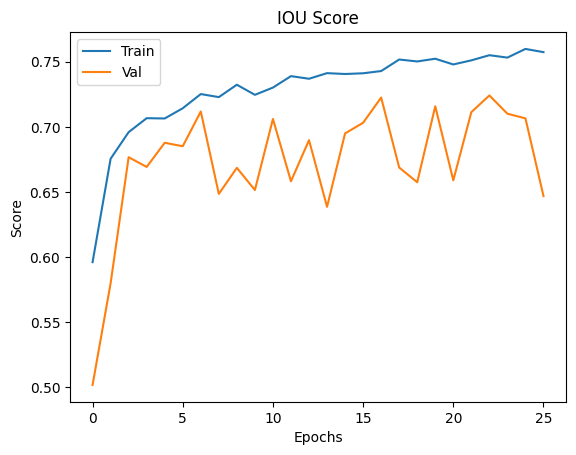

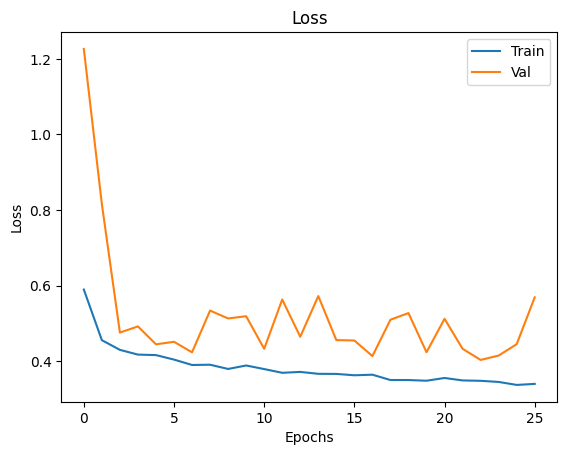

In [ ]:

if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)

# Callback для сохранения модели каждую эпоху
checkpoint = ModelCheckpoint(
    model_save_path + 'model_{epoch:02d}.h5',
    save_best_only=False,
    save_weights_only=False,
    monitor='val_loss',
)

# Callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_iou_score',
    patience=25,
    verbose=1,
    restore_best_weights=True
)

# Callback для TensorBoard
tensorboard = TensorBoard(log_dir='logs')

history = model.fit(
    train_img_gen,
    steps_per_epoch=200,
    epochs=40,
    validation_data=val,
    validation_steps=50,
    callbacks=[checkpoint, early_stopping, tensorboard]
)

# График точности и потерь
import matplotlib.pyplot as plt

plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('IOU Score')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend(['Train', 'Val'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.show()

Модель можно скачать тут

https://drive.google.com/file/d/10CalXbo6R2Z2i3TxvFUemj7pPWjffv_Y/view?usp=sharing

In [ ]:
ModelPath='/content/drive/MyDrive/modexyu/model_20.h5'
model = load_model(ModelPath, compile=False)



(16, 256, 256, 3)
1/1 [==============================] - 0s 53ms/step
Mean IoU = 0.3974558
[0 1]
[60979  4557]
[0 1]
[60762  4774]


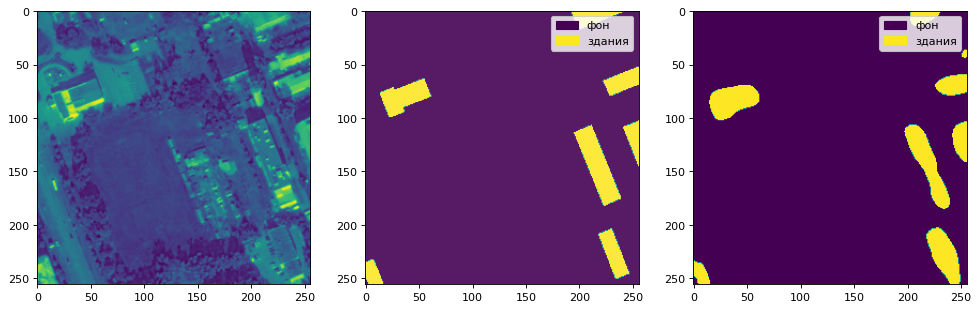

1/1 [==============================] - 0s 30ms/step
(16, 256, 256, 3)
Mean IoU = 0.78554076
[0]
[65536]
[0]
[65536]


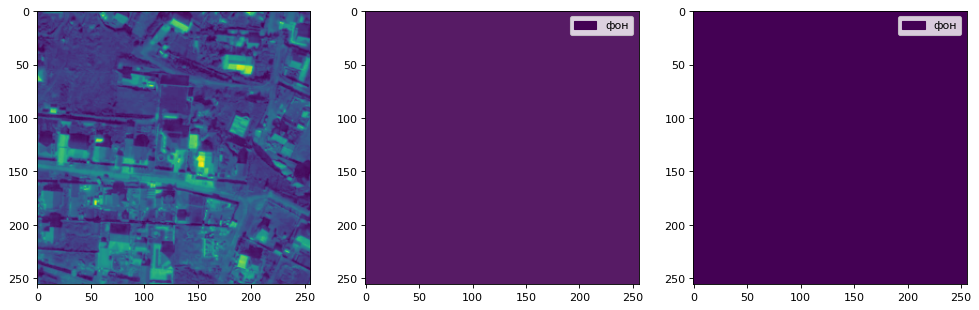

1/1 [==============================] - 0s 31ms/step
(16, 256, 256, 3)
Mean IoU = 0.76935524
[0]
[65536]
[0]
[65536]


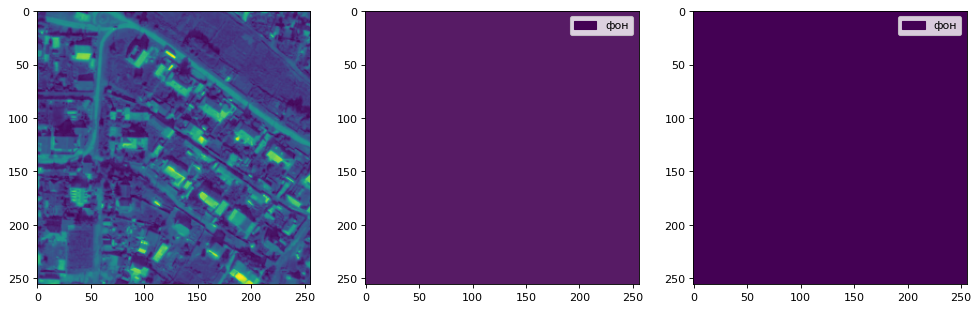

1/1 [==============================] - 0s 42ms/step
(16, 256, 256, 3)
Mean IoU = 0.79507005
[0 1]
[58472  7064]
[0 1]
[58459  7077]


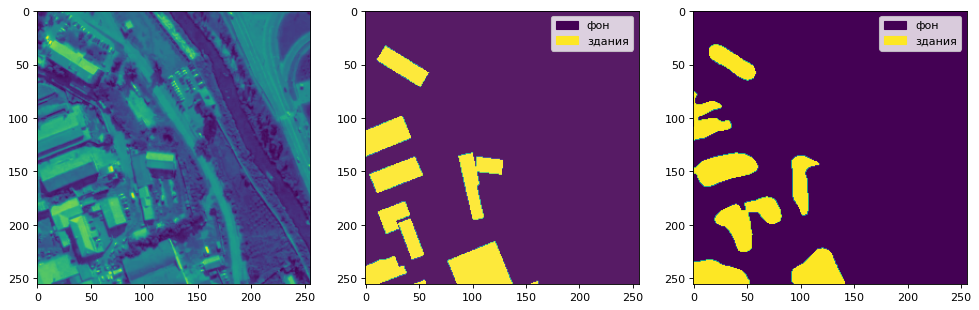

1/1 [==============================] - 0s 46ms/step
(16, 256, 256, 3)
Mean IoU = 0.75028586
[0 1]
[51413 14123]
[0 1]
[60559  4977]


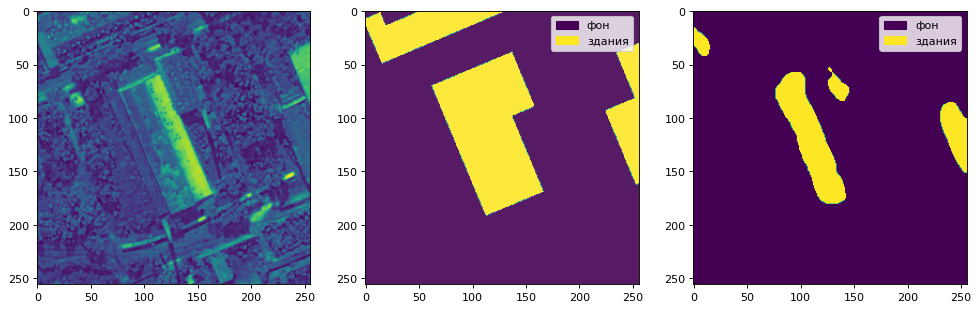

1/1 [==============================] - 0s 39ms/step
(16, 256, 256, 3)
Mean IoU = 0.74682134
[0 1]
[59191  6345]
[0 1]
[58649  6887]


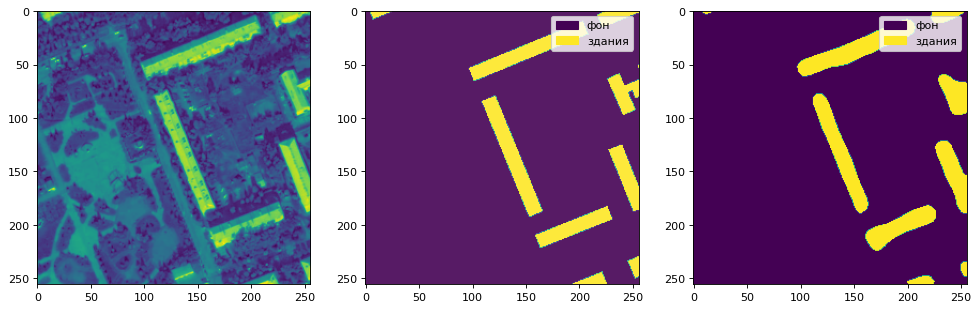

1/1 [==============================] - 0s 40ms/step
(16, 256, 256, 3)
Mean IoU = 0.71015877
[0 1]
[50483 15053]
[0 1]
[44977 20559]


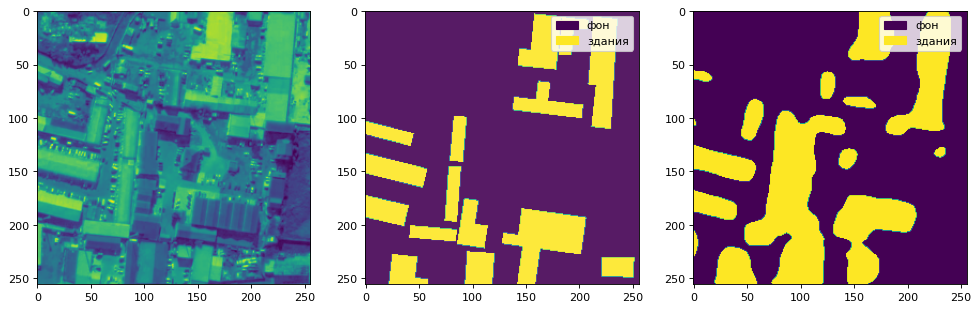

1/1 [==============================] - 0s 50ms/step
(16, 256, 256, 3)
Mean IoU = 0.77164376
[0 1]
[59904  5632]
[0 1]
[59897  5639]


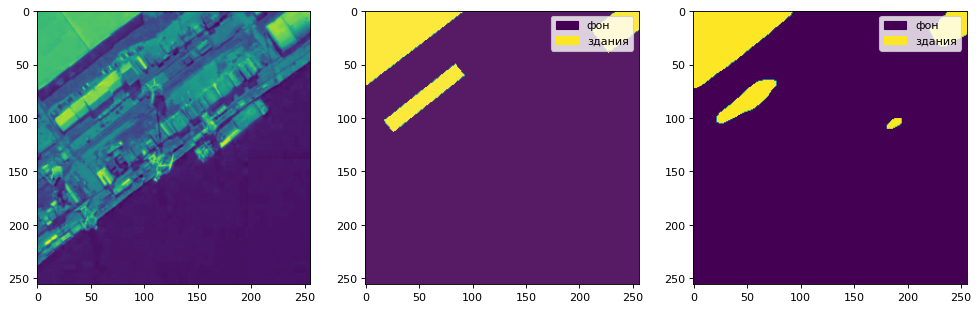

1/1 [==============================] - 0s 38ms/step
(16, 256, 256, 3)
Mean IoU = 0.80120116
[0]
[65536]
[0]
[65536]


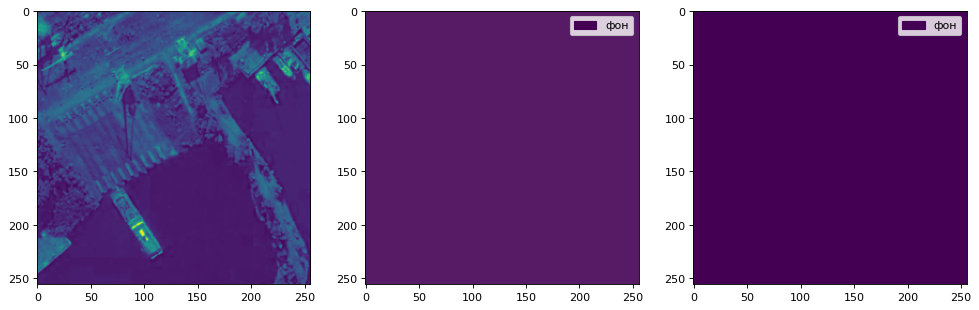

1/1 [==============================] - 0s 38ms/step
(16, 256, 256, 3)
Mean IoU = 0.77205366
[0 1]
[55394 10142]
[0 1]
[54799 10737]


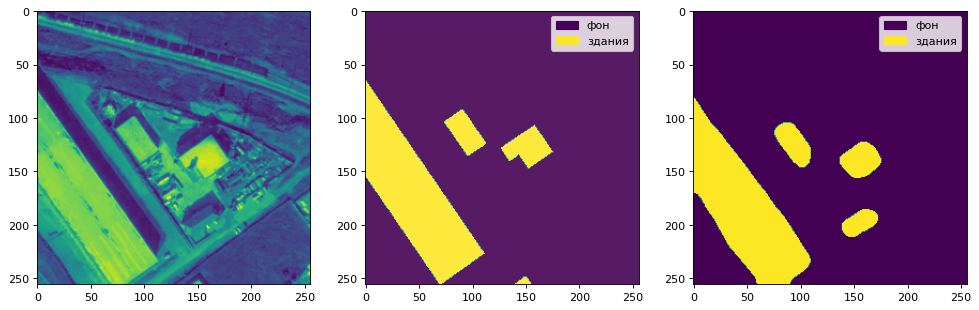

1/1 [==============================] - 0s 42ms/step
(16, 256, 256, 3)
Mean IoU = 0.7273755
[0 1]
[57279  8257]
[0 1]
[57088  8448]


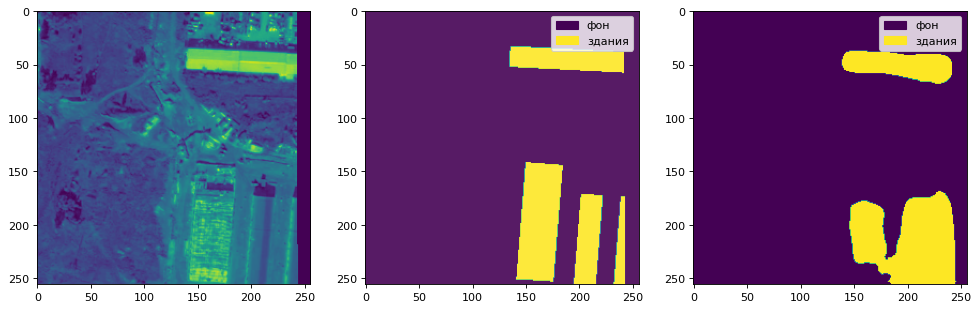

1/1 [==============================] - 0s 39ms/step
(16, 256, 256, 3)
Mean IoU = 0.7819494
[0 1]
[57247  8289]
[0 1]
[59595  5941]


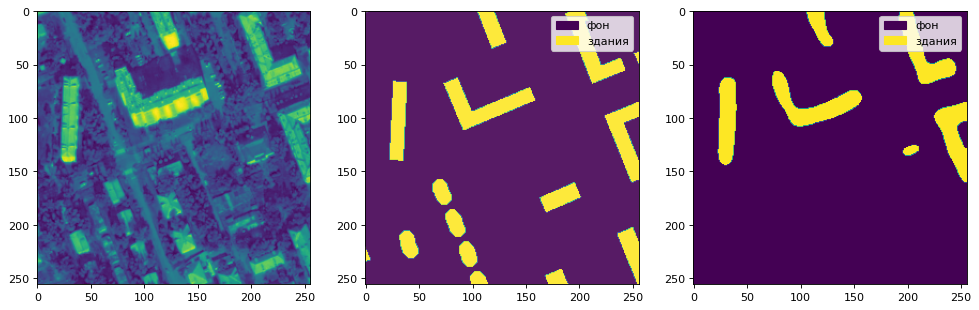

1/1 [==============================] - 0s 56ms/step
(16, 256, 256, 3)
Mean IoU = 0.74142903
[0 1]
[56262  9274]
[0 1]
[53949 11587]


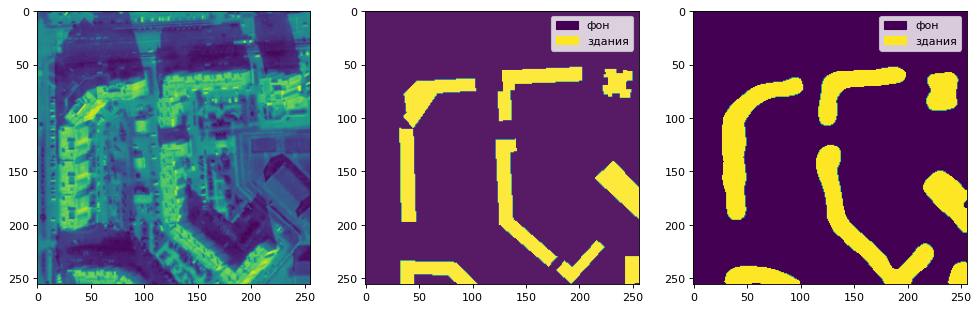

1/1 [==============================] - 0s 56ms/step
(16, 256, 256, 3)
Mean IoU = 0.82517934
[0]
[65536]
[0]
[65536]


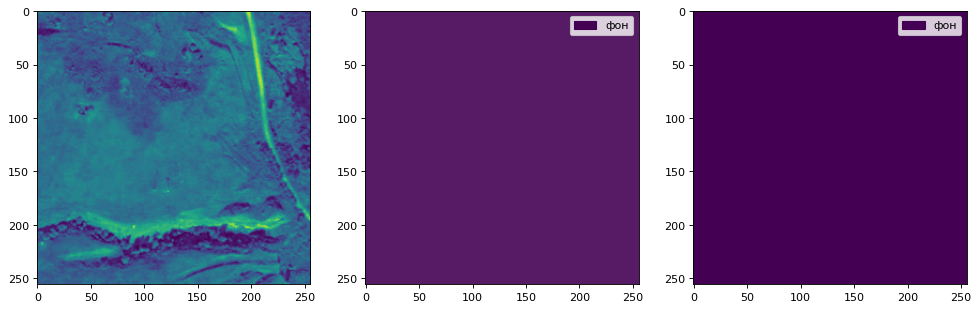

1/1 [==============================] - 0s 62ms/step
(16, 256, 256, 3)
Mean IoU = 0.7774977
[0 1]
[62519  3017]
[0 1]
[64725   811]


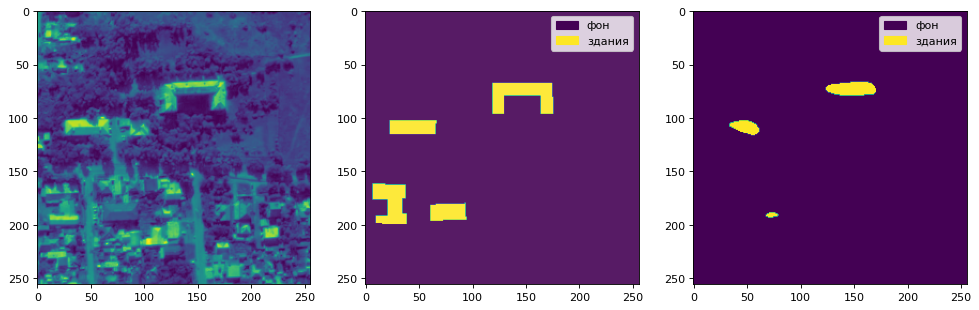

1/1 [==============================] - 0s 57ms/step
(16, 256, 256, 3)
Mean IoU = 0.7722969
[0]
[65536]
[0]
[65536]


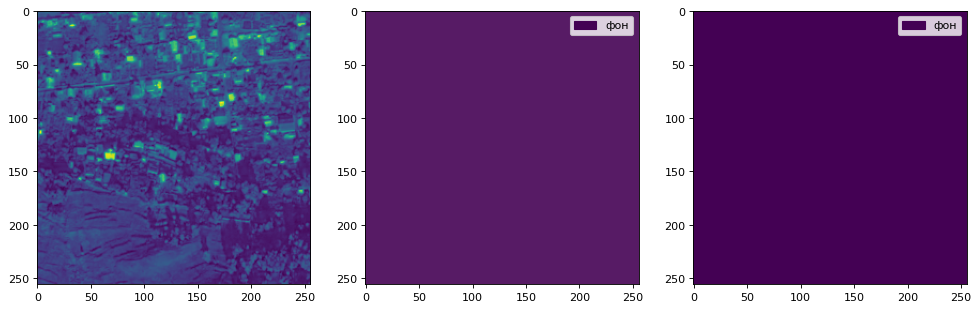

1/1 [==============================] - 0s 48ms/step
(16, 256, 256, 3)
Mean IoU = 0.7648382


In [ ]:
eval_preds_img_gen = test
test_image_batch, test_mask_batch = eval_preds_img_gen.__next__()
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3)
print(test_image_batch.shape)
test_pred_batch = model.predict(test_image_batch[:,  :, :, :])
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=3)


IOU_keras = MeanIoU(num_classes=N_CLASSES, ignore_class=[0])
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

img_num = random.randint(0, test_image_batch.shape[0])

for i in range(0, min(16, len(test_mask_batch_argmax) - img_num)):
  combined_data = np.array(list(np.unique(test_mask_batch_argmax[img_num+i])) + list(np.unique(test_pred_batch_argmax[img_num+i])))
  _min, _max = np.amin(combined_data), np.amax(combined_data)
  plt.figure(figsize=(15, 15), dpi=80)

  plt.subplot(1,3,1)
  plt.imshow(test_image_batch[:,  :, :, 0][img_num+i]* 6)

  plt.subplot(1,3,2)
  show_mask_with_label(test_mask_batch_argmax[img_num+i], labels, _min, _max, alpha=0.9)

  plt.subplot(1,3,3)

  show_mask_with_label(test_pred_batch_argmax[img_num+i], labels, _min, _max)
  plt.show()
  test_image_batch, test_mask_batch = eval_preds_img_gen.__next__()
  test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3)

  test_pred_batch = model.predict(test_image_batch[:,  :, :, :])
  print(test_image_batch.shape)
  test_pred_batch_argmax = np.argmax(test_pred_batch, axis=3)


  IOU_keras = MeanIoU(num_classes=N_CLASSES )# you can ignore "background" class
  IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
  print("Mean IoU =", IOU_keras.result().numpy())

  # img_num = random.randint(0, test_image_batch.shape[0]-4)



In [ ]:
def prediction(img, patch_size):
    stride_size = 128
    patch_size = 256
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    for i in range(0, img.shape[0]-patch_size+1, stride_size):
        for j in range(0, img.shape[1]-patch_size+1, stride_size):
            img_patch = img[i:i+patch_size, j:j+patch_size,:]
            img_patch = preprocess_input(img_patch)
            img_patch = np.expand_dims(img_patch, axis=0)
            pred_mask = model.predict(img_patch)
            pred_mask = np.argmax(pred_mask, axis=3)[0].astype('uint8')
            pred_mask = cv2.resize(pred_mask, (patch_size, patch_size))
            mask[i:i+patch_size, j:j+patch_size] = pred_mask
    true_mask = cv2.imread("/content/drive/MyDrive/dataset/data_2/test/masks/train_mask_010.png", 0)  # Загрузите истинную маску, используя правильный путь

    difference = np.abs(mask - true_mask)  # Вычислите разницу между предсказанной и истинной масками
    error = np.sum(difference) / (mask.shape[0] * mask.shape[1])  # Вычислите погрешность
    return mask, error

image_file="/content/drive/MyDrive/dataset/data_2/test/images/train_image_010.png"
img = cv2.imread(image_file)
patch_size = 256

predicted_mask, prediction_error = prediction(img, patch_size)
print("Prediction error:", prediction_error)

1/1 [==============================] - 0s 24ms/step
Prediction error: 11.968059875516275


#matrix

In [ ]:
from sklearn.metrics import confusion_matrix

true_mask = cv2.imread("/content/drive/MyDrive/dataset/data_2/test/masks/train_mask_010.png", 0)  # Загрузите истинную маску, используя правильный путь


def calculate_binary_metrics(true_mask, predicted_mask):
    # Ensure masks contain only 0 and 1
    true_mask = (true_mask > 0).astype(int)
    predicted_mask = (predicted_mask > 0).astype(int)

    # Flatten the 2D arrays to 1D arrays
    true_mask_flat = true_mask.flatten()
    predicted_mask_flat = predicted_mask.flatten()

    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_mask_flat, predicted_mask_flat)

    # Ensure the confusion matrix is 2x2
    if conf_matrix.shape == (2, 2):
        tn, fp, fn, tp = conf_matrix.ravel()
    else:
        raise ValueError("Confusion matrix is not 2x2. Check the input masks.")

    # Metrics for class 1
    precision_1 = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall_1 = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) != 0 else 0

    # Metrics for class 0
    precision_0 = tn / (tn + fn) if (tn + fn) != 0 else 0
    recall_0 = tn / (tn + fp) if (tn + fp) != 0 else 0
    f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0) if (precision_0 + recall_0) != 0 else 0

    return (precision_0, recall_0, f1_0), (precision_1, recall_1, f1_1)


metrics_class_0, metrics_class_1 = calculate_binary_metrics(true_mask, predicted_mask)
print("Metrics for Class 0 (Background):")
print(f"Precision: {metrics_class_0[0]}, Recall: {metrics_class_0[1]}, F1-Score: {metrics_class_0[2]}")

print("\nMetrics for Class 1 (Target):")
print(f"Precision: {metrics_class_1[0]}, Recall: {metrics_class_1[1]}, F1-Score: {metrics_class_1[2]}")


Metrics for Class 0 (Background):
Precision: 0.9731858925024867, Recall: 0.9848538347002461, F1-Score: 0.978985099016859

Metrics for Class 1 (Target):
Precision: 0.7491104940887884, Recall: 0.6249881303156698, F1-Score: 0.6814433240602559


#result mask

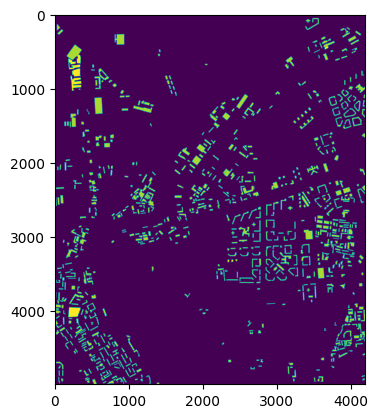

In [ ]:
true_mask = cv2.imread("/content/drive/MyDrive/dataset/data_2/test/masks/train_mask_010.png", 0)  # Загрузите истинную маску, используя правильный путь
plt.imshow(true_mask)
plt.show()

#


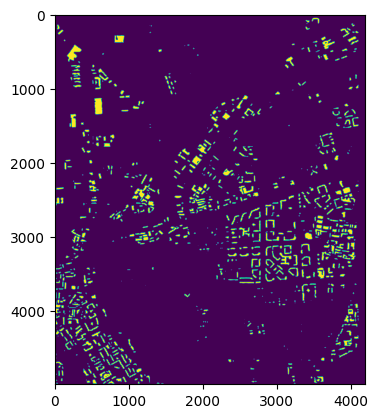

In [ ]:

plt.imshow(predicted_mask)
plt.show()

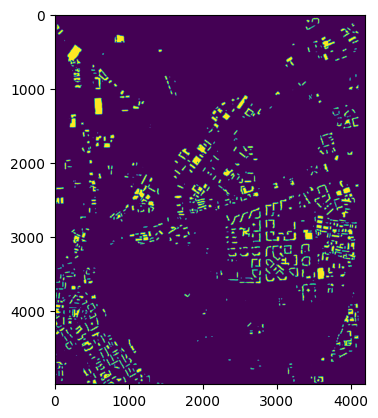

In [ ]:

plt.imshow(predicted_mask)
plt.show()